In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import datetime

In [3]:
sales = pd.read_excel("sales_2021_Q1.xlsx")
sales = pd.concat([sales, pd.read_excel("sales_2021_Q2.xlsx")])

## Customer Behaviour

* Customer store preferences
* Number of visits per customer in period
* Average ticket size (the average amount of money a customer spends per transaction)
* Average basket size (the average number of items sold per transaction)
* Average amount of money a customer spends per item

In [4]:
customer_summary = sales.groupby(by=['CustomerID','Store']).count()
customer_summary.reset_index(inplace=True)
max_visits = customer_summary.groupby(by=['CustomerID']).max()
max_visits.reset_index(inplace=True)

In [5]:
customer_preferences = pd.DataFrame(columns=['CustomerID', 'Store'])
for i in range(0, len(max_visits)):
    val = customer_summary[(customer_summary['CustomerID'] == max_visits['CustomerID'][i]) & (customer_summary['Amount'] == max_visits['Amount'][i])]['Store'].values[0]
    customer_preferences = pd.concat([customer_preferences, pd.DataFrame([[max_visits['CustomerID'][i], val]],columns=['CustomerID', 'Store'])], ignore_index=True)

In [6]:
customer_store_preferences = customer_preferences.groupby(by=['Store']).count()
customer_store_preferences.reset_index(inplace=True)

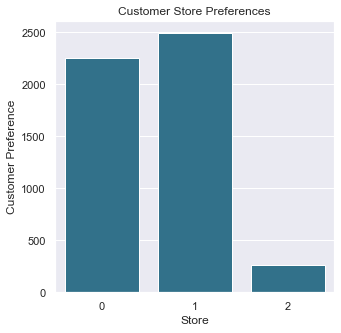

In [70]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5, 5)
color_set = ['#237799']
sns.barplot(data=customer_store_preferences ,x='Store', y='CustomerID', ax=ax, color=color_set[0])
ax.title.set_text('Customer Store Preferences')
ax.set(xlabel='Store', ylabel='Customer Preference');

In [8]:
sales_per_customer = sales.groupby(by=['InvoiceID', 'CustomerID']).count()
sales_per_customer.reset_index(inplace=True)
sales_per_customer = sales_per_customer[['InvoiceID', 'CustomerID']]
visit_per_customer = sales_per_customer.groupby(['CustomerID']).count()
visit_per_customer.reset_index(inplace=True)

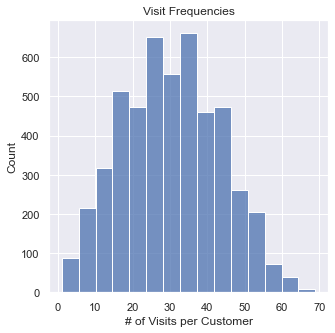

In [71]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(5, 5)
sns.histplot(data=visit_per_customer, x='InvoiceID', ax=ax, bins=15)
ax.title.set_text('Visit Frequencies')
ax.set(xlabel='# of Visits per Customer');

In [10]:
invoices = sales.groupby(['InvoiceID', 'Store']).sum()[['Amount', 'Price']]
invoices.reset_index(inplace=True)

In [11]:
invoices.loc[:,'Store'] = invoices['Store'].apply(lambda row : str(row))

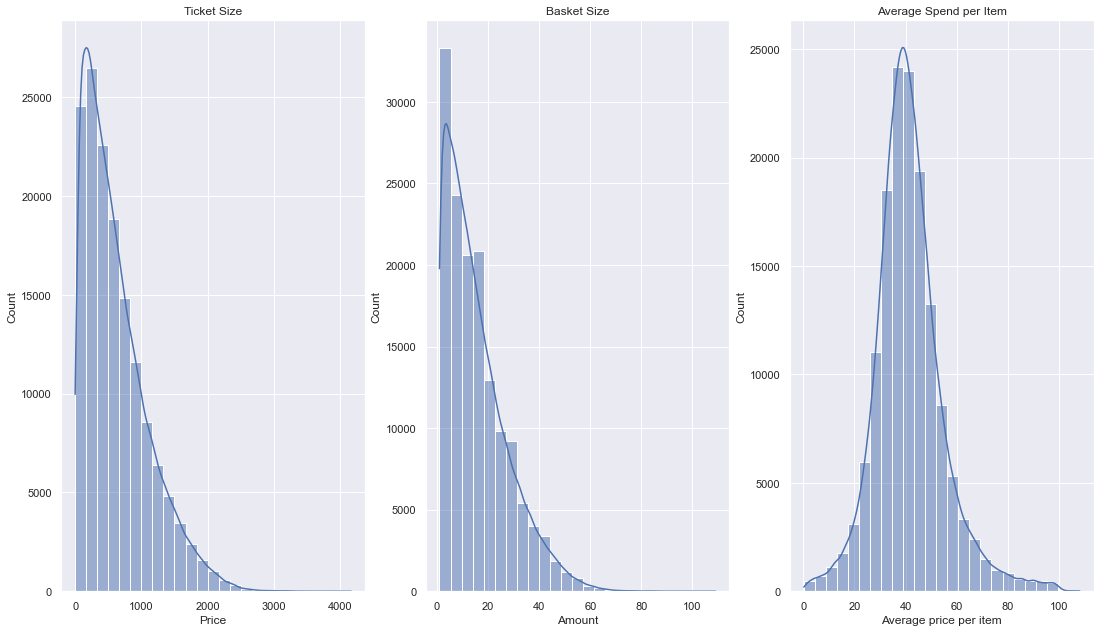

In [45]:
sns.set()
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18.5, 10.5)

sns.histplot(invoices['Price'], ax=ax[0],kde=True, bins=25)
sns.histplot(invoices['Amount'], ax=ax[1],kde=True, bins=25)
ax[2].set_xlabel("Average price per item")
ax[0].title.set_text('Ticket Size')
ax[1].title.set_text('Basket Size')
ax[2].title.set_text('Average Spend per Item')
sns.histplot(invoices['Price']/invoices['Amount'], ax=ax[2],kde=True, bins=25);

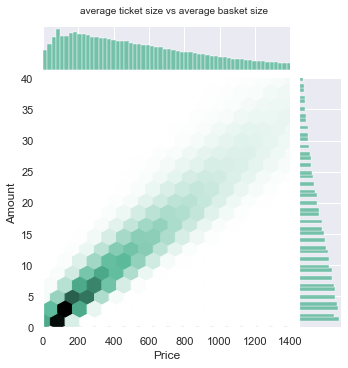

In [66]:
jp = sns.jointplot(data=invoices, x='Price', y='Amount', kind='hex', color='#4CB391', height=5, xlim=(0,1400), ylim=(0,40));
jp.fig.suptitle("average ticket size vs average basket size",y=1.02,fontsize=10);

## Store Performance

* Daily visitors
* Daily revenue
* Performance evaluation of weekdays
* Performance evaluation of months

In [14]:
daily_customer = sales.groupby(by=['Store', 'Date']).count()
daily_customer.reset_index(inplace=True)

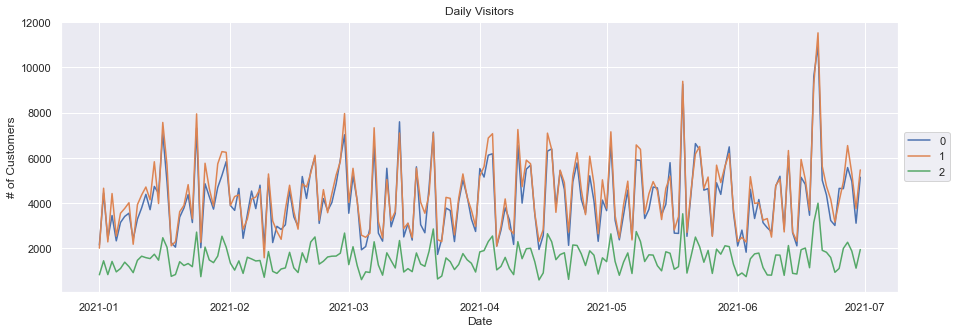

In [72]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 5)
# color_set = ['#239900']
for i in range(0,3):
    filtered_sales = daily_customer[daily_customer['Store'] == i]
    sns.lineplot(data=filtered_sales, x='Date', y='CustomerID', ax=ax, label = i)
ax.title.set_text('Daily Visitors')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
ax.set(xlabel='Date', ylabel='# of Customers');

In [16]:
visits = pd.DataFrame(sales.groupby(['Date', 'Store']).count()['CustomerID'])

In [17]:
visits.reset_index(inplace=True)

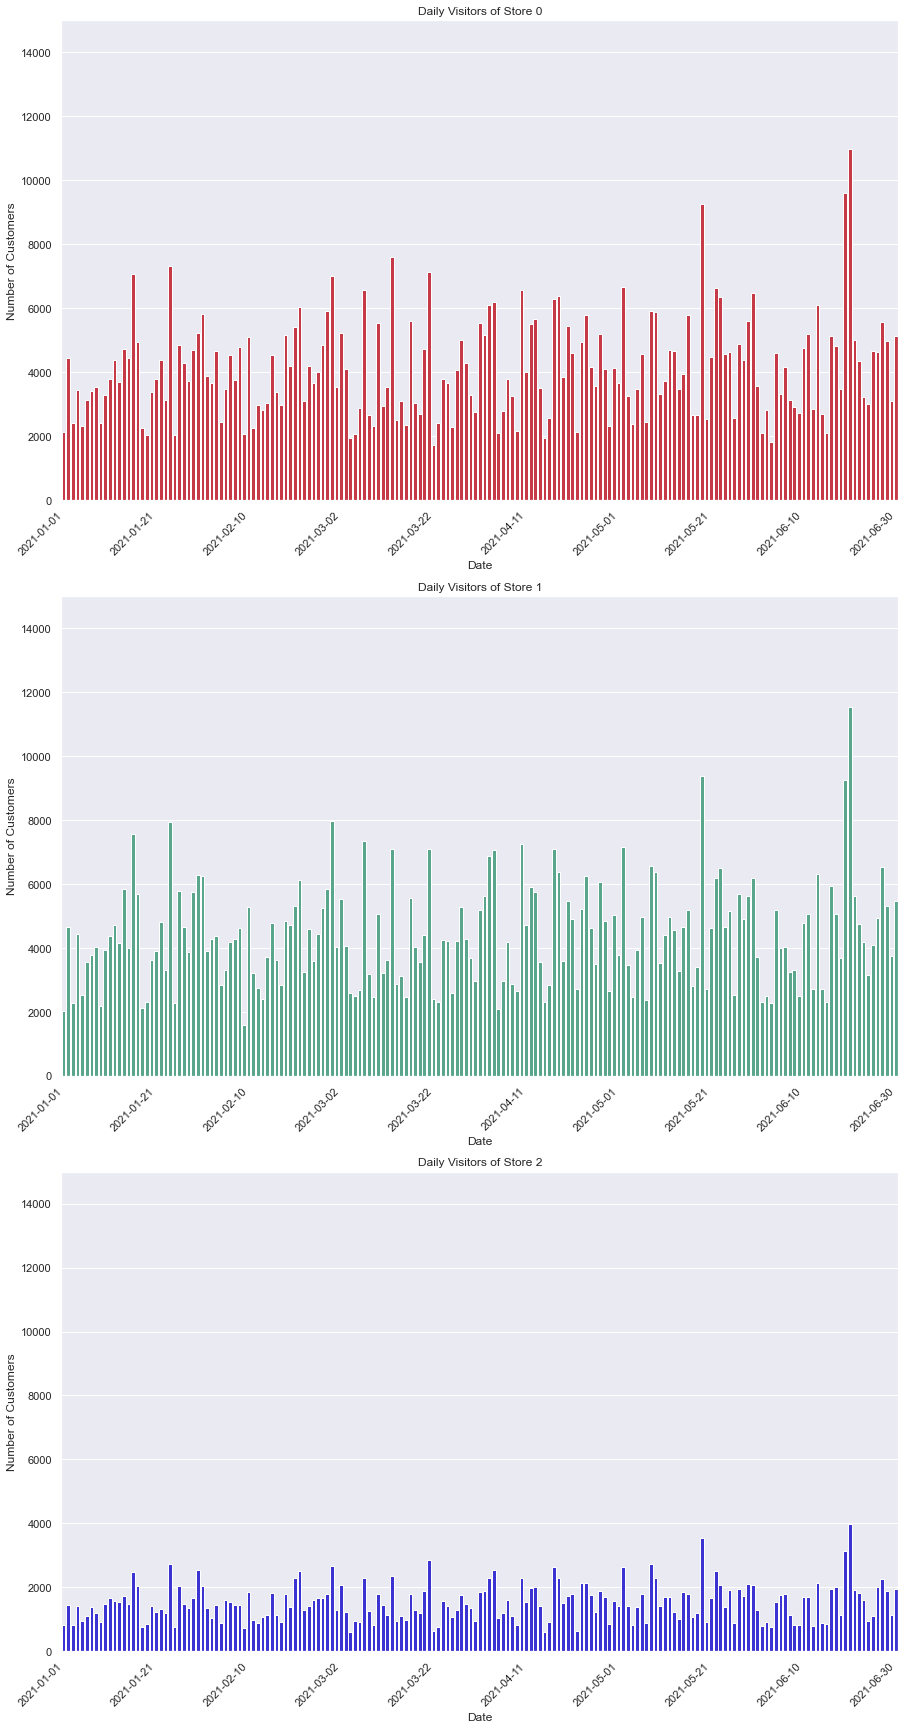

In [73]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(15, 30)
color_set = ['#DD2233', '#4CB391', '#2319EE']
for i in range(0,3):
    sns.barplot(data=visits[visits['Store'] == i] ,x='Date', y='CustomerID', ax=ax[i], color=color_set[i])
    ax[i].set(xlabel='Date', ylabel='Number of Customers', ylim=(0, 15000))
    ax[i].title.set_text('Daily Visitors of Store ' + str(i))
    ax[i].set_xticklabels([str(d)[:10] for d in visits[visits['Store'] == i]['Date']], rotation = 45, ha="right")
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(base=20))

In [19]:
daily_revenue = pd.DataFrame(sales.groupby(by=['Date', 'Store']).sum()['Price'])
daily_revenue.reset_index(inplace=True)

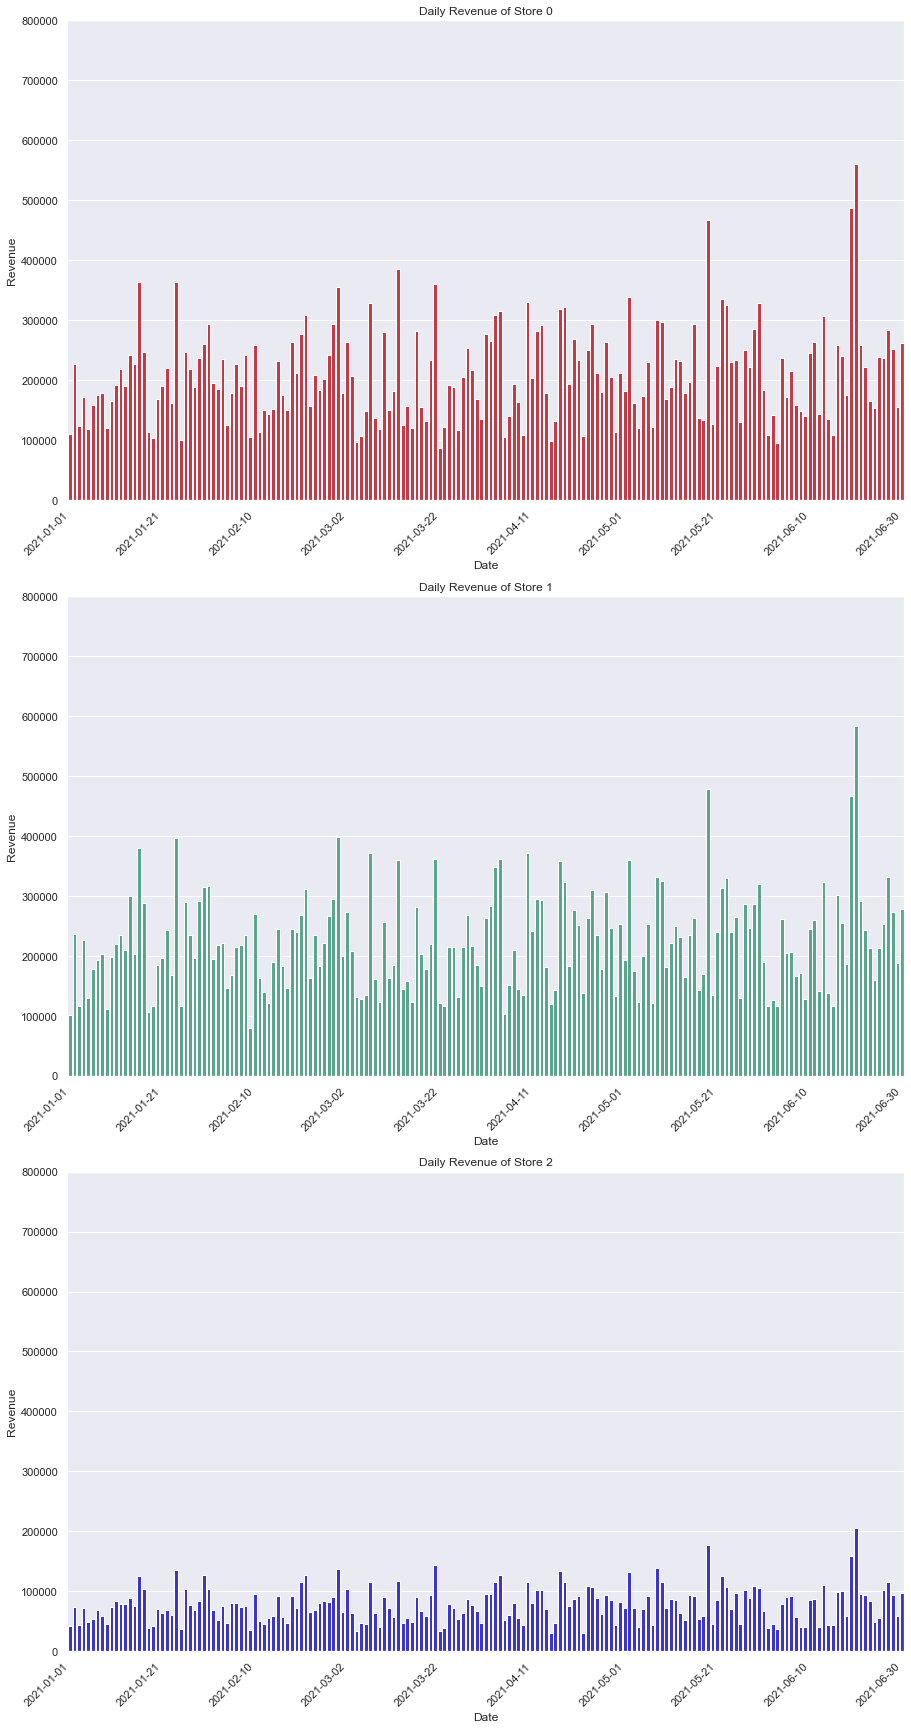

In [74]:
fig, ax = plt.subplots(3,1)
fig.set_size_inches(15, 30)
color_set = ['#DD2233', '#4CB391', '#2319EE']
for i in range(0,3):
    sns.barplot(data=daily_revenue[daily_revenue['Store'] == i], x='Date', y='Price', ax=ax[i], color=color_set[i])
    ax[i].set(xlabel='Date', ylabel='Revenue', ylim=(0, 800000))
    ax[i].title.set_text('Daily Revenue of Store ' + str(i))
    ax[i].set_xticklabels([str(d)[:10] for d in daily_revenue[daily_revenue['Store'] == i]['Date']], rotation = 45, ha="right")
    ax[i].xaxis.set_major_locator(ticker.MultipleLocator(base=20))

In [21]:
sales['Weekday'] = sales['Date'].dt.dayofweek
sales_day = sales.groupby(['Weekday', 'Store']).sum()
sales_day.reset_index(inplace=True)

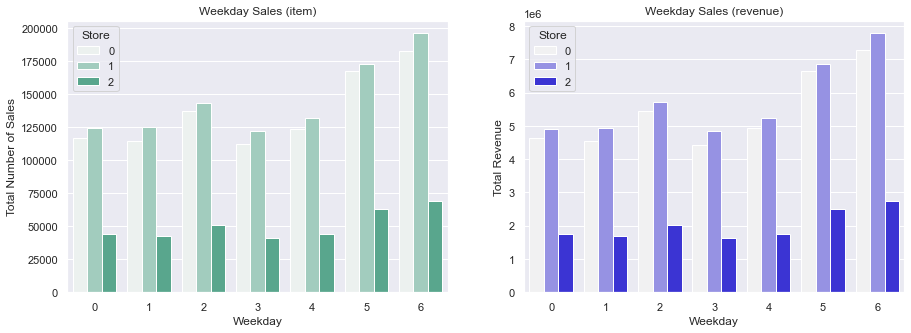

In [51]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
color_set = ['#4CB391', '#2319EE']
sns.barplot(data=sales_day, x='Weekday', y='Amount', ax=ax[0], color=color_set[0], hue=sales_day['Store'])
ax[0].set(xlabel='Weekday', ylabel='Total Number of Sales')
ax[0].title.set_text('Weekday Sales (item)')
sns.barplot(data=sales_day, x='Weekday', y='Price', ax=ax[1], color=color_set[1], hue=sales_day['Store'])
ax[1].title.set_text('Weekday Sales (revenue)')
ax[1].set(xlabel='Weekday', ylabel='Total Revenue');

In [23]:
sales['Month'] = sales['Date'].dt.month
monthly_sales = sales.groupby(by=['Month', 'Store']).sum()
monthly_sales.reset_index(inplace=True)

In [24]:
sales_count_by_day = sales.groupby(by=['Store', 'Month','Weekday']).count()
sales_count_by_day.reset_index(inplace=True)
sales_sum_by_day = sales.groupby(by=['Store', 'Month','Weekday']).sum()
sales_sum_by_day.reset_index(inplace=True)

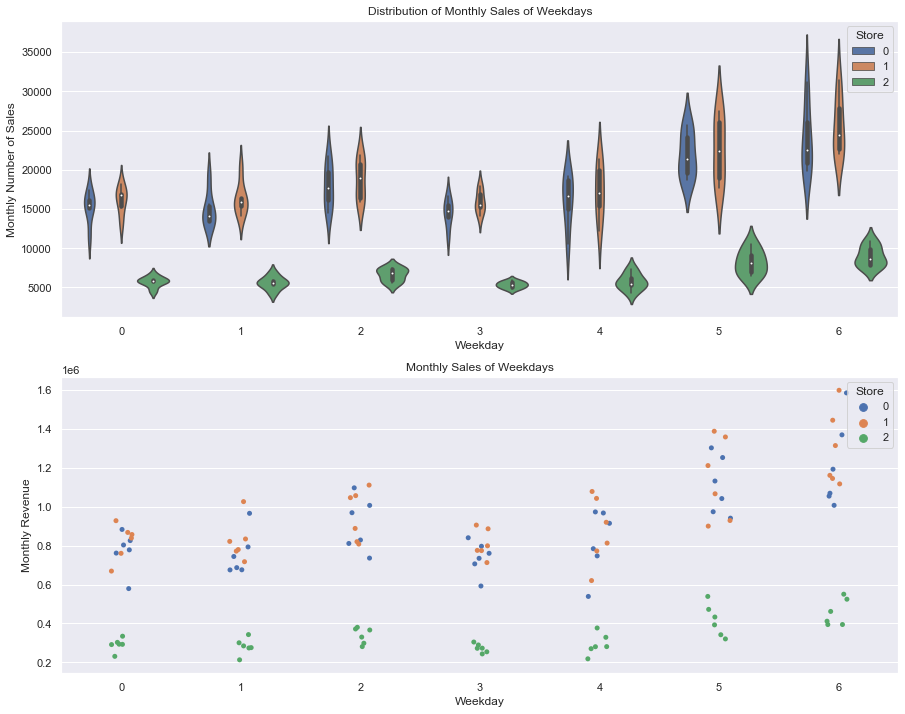

In [75]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(15, 12)
sns.violinplot(data=sales_count_by_day, x='Weekday', y='CustomerID', hue='Store', ax=ax[0])
sns.stripplot(data=sales_sum_by_day, x='Weekday', y='Price', hue='Store', ax=ax[1])
ax[0].title.set_text('Distribution of Monthly Sales of Weekdays')
ax[0].set(xlabel='Weekday', ylabel='Monthly Number of Sales')
ax[1].title.set_text('Monthly Sales of Weekdays')
ax[1].set(xlabel='Weekday', ylabel='Monthly Revenue');

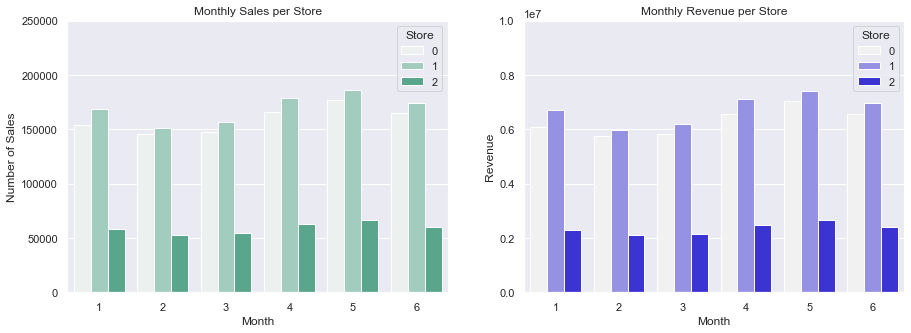

In [76]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
color_set = ['#4CB391', '#2319EE']
sns.barplot(data=monthly_sales, x='Month', y='Amount', ax=ax[0], color=color_set[0], hue='Store')
ax[0].set(xlabel='Month', ylabel='Number of Sales', ylim=(0,250000))
ax[0].title.set_text('Monthly Sales per Store')
sns.barplot(data=monthly_sales, x='Month', y='Price', ax=ax[1], color=color_set[1], hue='Store')
ax[1].title.set_text('Monthly Revenue per Store')
ax[1].set(xlabel='Month', ylabel='Revenue', ylim=(0,10000000));

In [77]:
monthly_store_sales = sales.groupby(by=['Month', 'Store']).sum()
monthly_store_sales.reset_index(inplace=True)
monthly_store_visits = sales.groupby(by=['Month', 'Store']).count()
monthly_store_visits.reset_index(inplace=True)

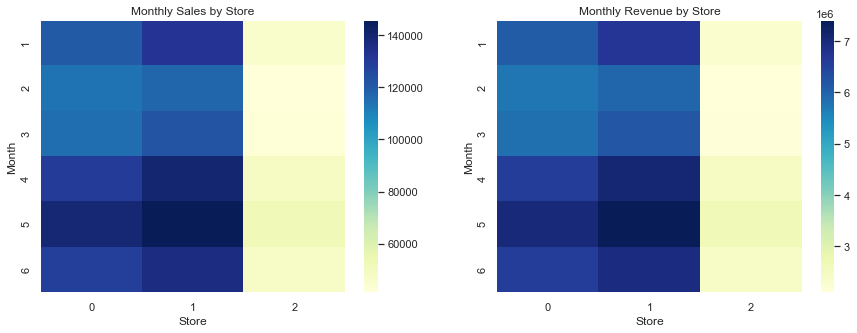

In [78]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 5)
visits_rectangular = pd.crosstab(monthly_store_visits.Month, monthly_store_visits.Store, values=monthly_store_visits.Amount, aggfunc='sum')
sales_rectangular = pd.crosstab(monthly_store_sales.Month, monthly_store_sales.Store, values=monthly_store_sales.Price, aggfunc='sum')
sns.heatmap(visits_rectangular, ax=ax[0], cmap="YlGnBu")
sns.heatmap(sales_rectangular, ax=ax[1], cmap="YlGnBu")
ax[0].title.set_text('Monthly Sales by Store')
ax[1].title.set_text('Monthly Revenue by Store');

In [29]:
monthly_store_data = monthly_store_visits
monthly_store_data['Revenue'] = monthly_store_sales['Price']
monthly_store_data = monthly_store_data[['Month', 'Store', 'Amount', 'Revenue']]

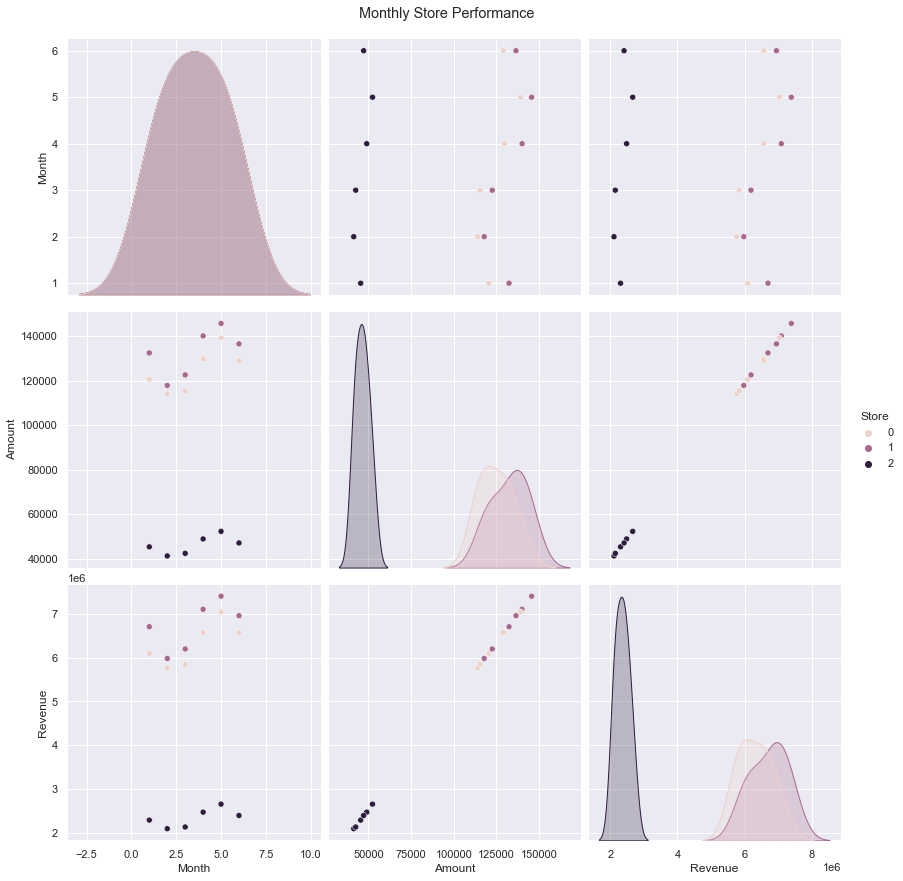

In [62]:
pp = sns.pairplot(monthly_store_data, hue="Store",height=4)
pp.fig.suptitle("Monthly Store Performance",y=1.02);

## Analysis of Product Categories

* Monthly category sales
* Total number of sales per store
* Total revenue per store

In [31]:
monthly_cat_sales = sales.groupby(by=['Month', 'Category']).sum()
monthly_cat_sales.reset_index(inplace=True)

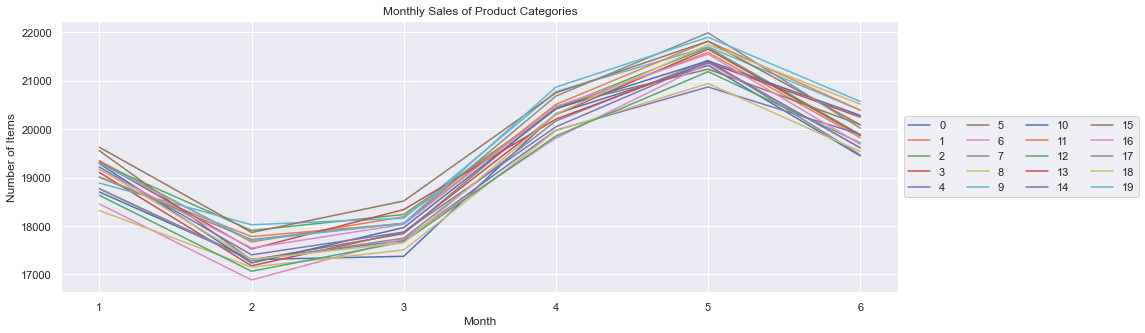

In [79]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 5)
# color_set = ['#239900']
for i in range(0,20):
    filtered_sales = monthly_cat_sales[monthly_cat_sales['Category'] == i]
    sns.lineplot(data=filtered_sales, x='Month', y='Amount', ax=ax, label = i)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=4)
ax.title.set_text('Monthly Sales of Product Categories')
ax.set(xlabel='Month', ylabel='Number of Items');

In [33]:
category_sales = sales.groupby(by=['Store', 'Category']).sum()
category_sales.reset_index(inplace=True)

In [34]:
category_sales_all = sales.groupby(by=['Category']).sum()
category_sales_all.reset_index(inplace=True)

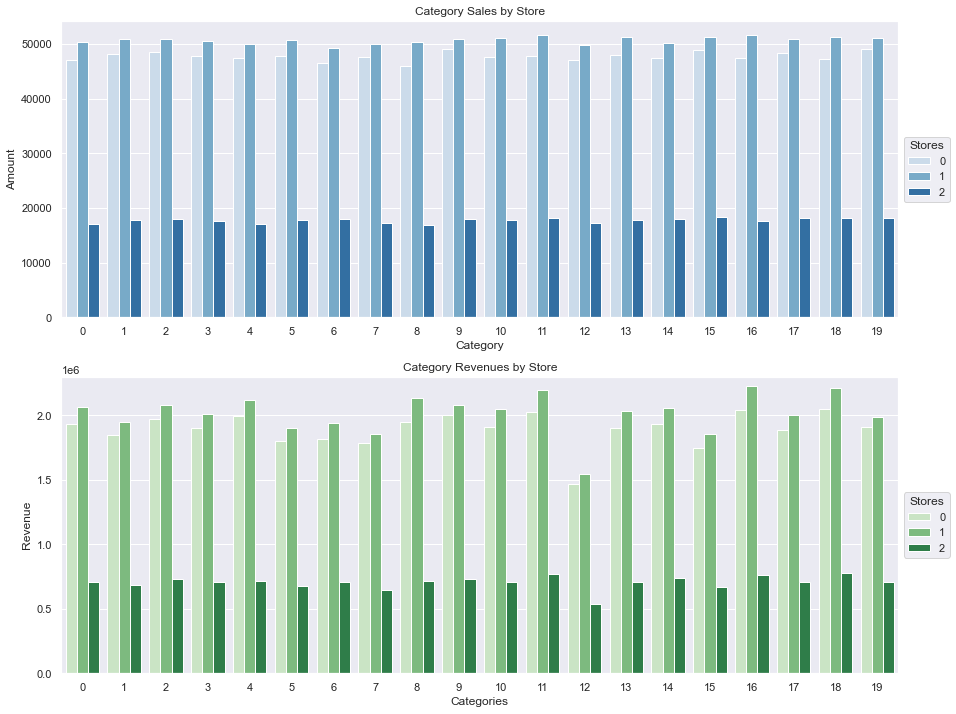

In [80]:
fig, ax = plt.subplots(2,1)
fig.set_size_inches(15, 12)
sns.barplot(data=category_sales, x='Category', y='Amount', hue='Store', ax=ax[0], palette="Blues");
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title='Stores')
ax[0].title.set_text('Category Sales by Store')
sns.barplot(data=category_sales, x='Category', y='Price', hue='Store', ax=ax[1], palette="Greens");
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title='Stores')
ax[1].title.set_text('Category Revenues by Store')
ax[1].set(xlabel='Categories', ylabel='Revenue', ylim=(0, 2300000));